<ipython-input-15-74579757f9a3>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Value"].fillna(df["Value"].interpolate(), inplace=True)
<ipython-input-15-74579757f9a3>:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").mean()


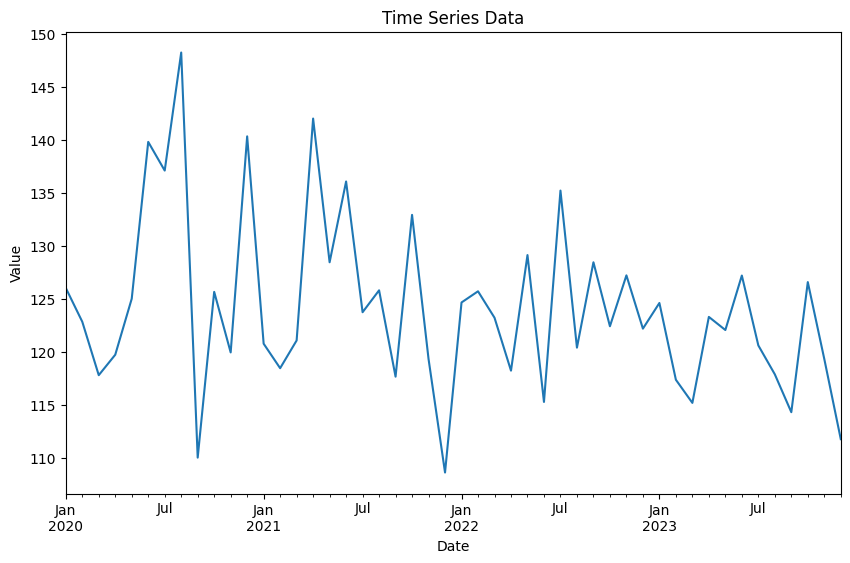

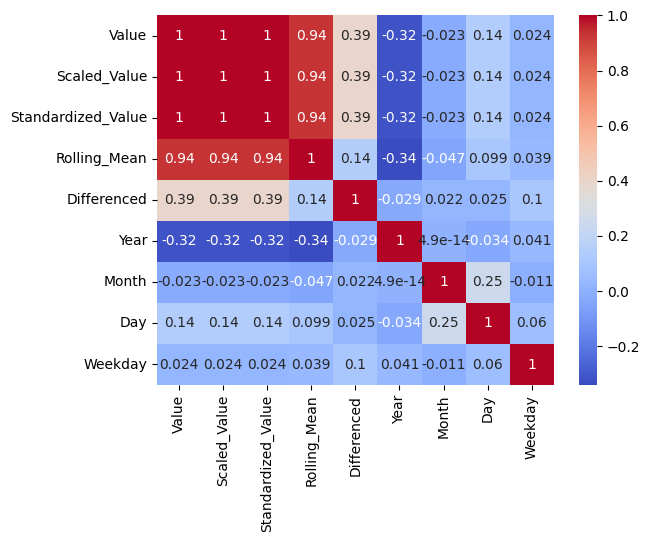

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
date_rng = pd.date_range(start="2020-01-01", end="2023-12-31", freq="D")
np.random.seed(42)
values = np.random.randint(50, 200, size=len(date_rng)).astype(float)
values[np.random.choice(len(values), size=50, replace=False)] = np.nan
df = pd.DataFrame({"Date": date_rng, "Value": values})
df.to_csv("time_series_data.csv", index=False)
df = pd.read_csv("time_series_data.csv", parse_dates=["Date"], index_col="Date")
df["Value"].fillna(df["Value"].interpolate(), inplace=True)
scaler = MinMaxScaler()
df["Scaled_Value"] = scaler.fit_transform(df[["Value"]])
df["Standardized_Value"] = StandardScaler().fit_transform(df[["Value"]])
df["Rolling_Mean"] = df["Value"].rolling(window=7).mean()
df["Differenced"] = df["Value"].diff()
df["Year"], df["Month"], df["Day"], df["Weekday"] = df.index.year, df.index.month, df.index.day, df.index.weekday
df = df[~df.index.duplicated(keep="first")]
Q1, Q3 = df["Value"].quantile(0.25), df["Value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df = df[(df["Value"] >= lower_bound) & (df["Value"] <= upper_bound)]
df = df.resample("M").mean()
df.to_csv("cleaned_time_series.csv")
df["Value"].plot(figsize=(10,6))
plt.title("Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()
